In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express
import cv2 as cv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
plt.style.use("seaborn")

warnings.filterwarnings('ignore')

In [2]:
def plot_image(image, i = 0):
    l = [cv.COLOR_BGR2RGB, cv.COLOR_BGR2GRAY, cv.COLOR_RGB2GRAY,]
    plt.imshow(cv.cvtColor(image, l[i]))
    plt.show(block = True)

In [3]:
def display_image(image):
    cv.imshow('image', image)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [4]:
def MinMaxScalar(x, a = -1, b = 1):
    N = (x - x.min()) * (b - a)
    D = (x.max() - x.min())
    return (N / D) + a

In [5]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [6]:
image = cv.imread('line1.jpg', 0)
image.shape

(99, 1280)

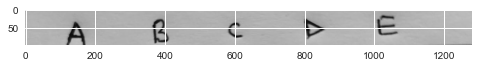

In [7]:
plot_image(image)

In [8]:
y1 = sigmoid(MinMaxScalar(image.sum(0)))
x1 = np.arange(len(y1))
c1 = y1.copy()
l = [0, 111, 190, 360, 416, 575, 630, 792, 864, 1004, 1077, 1279]
for i in range(len(l) - 1):
    if i % 2 == 0:
        c1[l[i] : l[i + 1]] = 1
    else:
        c1[l[i] : l[i + 1]] = 0
c1[l[i] : ] = 1
x1.shape, y1.shape, c1.shape

((1280,), (1280,), (1280,))

<AxesSubplot:>

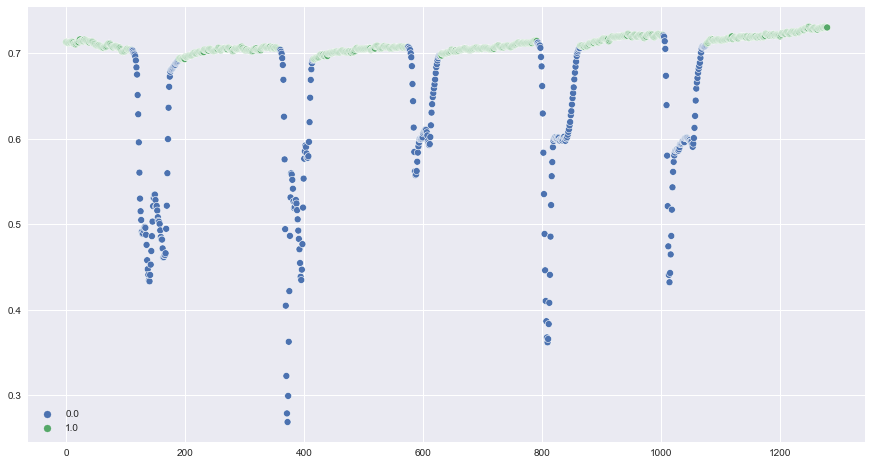

In [9]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x1, y1, hue = c1)

In [10]:
y1.shape, c1.shape

((1280,), (1280,))

In [11]:
window_size = 11
x, y = [], []
for i in range(len(y1) - window_size + 1):
    x.append(y1[i : i + window_size])
    y.append(c1[i : i + window_size])
x = np.array(x)
y =np.array(y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 72)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((889, 11), (381, 11), (889, 11), (381, 11))

In [13]:
svm = SVC()

In [14]:
multilabel_classifier = MultiOutputClassifier(svm, n_jobs = -1)

In [15]:
multilabel_classifier.fit(x_train, y_train)

MultiOutputClassifier(estimator=SVC(), n_jobs=-1)

In [16]:
y_pred = multilabel_classifier.predict(x_test)

In [17]:
accuracy_score(y_test, y_pred)

0.89501312335958

In [18]:
image1 = cv.imread('3.jpg', 0)
image1.shape

(623, 2460)

<AxesSubplot:>

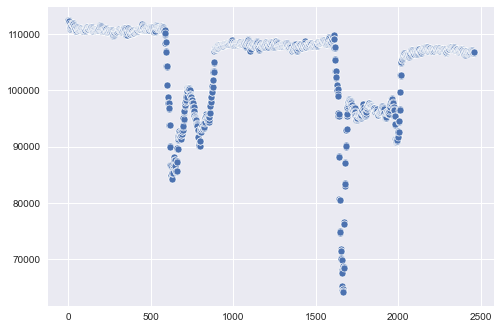

In [19]:
sns.scatterplot(range(len(image1.sum(0))), image1.sum(0),)

In [20]:
y2 = sigmoid(MinMaxScalar(image1.sum(0)))

In [21]:
x2 = []
for i in range(len(y2) - window_size + 1):
    x2.append(y2[i : i + window_size])
#     y.append(c1[i : i + window_size])

x2 =np.array(x2)
x2.shape

(2450, 11)

In [22]:
y2_pred = multilabel_classifier.predict(x2)

In [23]:
y2_pred.shape

(2450, 11)

In [24]:
l1 = [
    [1,2,3,4,5],
    [2,3,4,5,6],
    [3,4,5, 6,7],
]

In [25]:
z = window_size - 1
l1 = y2_pred
l2 = []
for i in range(window_size - 1):
    l2.append(l1[0][i])

for e in l1:
    l2 = np.concatenate((l2, e[z:]))
l2.shape, 

((2460,),)

(2460,)


<AxesSubplot:>

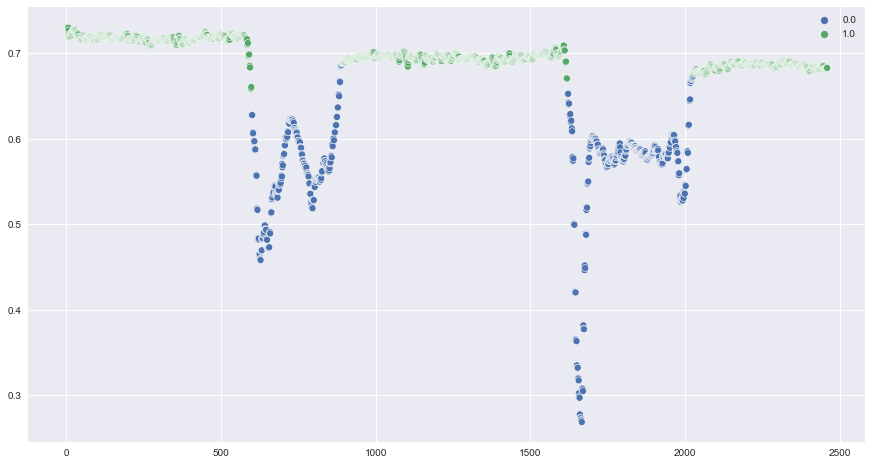

In [26]:
y1 = sigmoid(MinMaxScalar(image1.sum(0)))
x1 = np.arange(len(y1))
print(x1.shape)
plt.figure(figsize = (15, 8))
sns.scatterplot(x1, y1, hue = l2)